In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score


from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

from sklearn.ensemble import RandomForestClassifier

from scipy.stats import uniform, randint, loguniform
from sklearn.model_selection import RepeatedStratifiedKFold

In [2]:
sns.set_style("whitegrid", {'grid.linestyle': '--'})
sns.set_style({'font.family':'serif', 'font.serif':'Computer Modern'})
sns.set_context(font_scale=2, rc={"font.size":10,"axes.titlesize":20,"axes.labelsize":15})

In [3]:
df_train = pd.read_csv("df_train_processed.csv")
df_test = pd.read_csv("df_test_processed.csv")

In [4]:
df_train.head()

,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,sex,frame_count,sum,mean,...,stft_std_w4,stft_min_w4,stft_q01_w4,stft_q05_w4,stft_q25_w4,stft_q50_w4,stft_q75_w4,stft_q95_w4,stft_kur_w4,stft_skew_w4
0,speech,neutral,normal,Kids are talking by the door,1st,1,M,158558,0.145081,9.150000e-07,...,0.155455,0.000000,0.000000,0.566462,0.709962,0.799141,0.896606,1.0,6.742190,-1.706215
1,speech,neutral,normal,Kids are talking by the door,2nd,1,M,160160,0.114319,7.137790e-07,...,0.163183,0.270133,0.368623,0.472736,0.623183,0.744908,0.874713,1.0,-0.700420,-0.201495
2,speech,neutral,normal,Dogs are sitting by the door,1st,1,M,156956,0.149963,9.554485e-07,...,0.190634,0.000000,0.000000,0.417919,0.643636,0.774253,0.899156,1.0,1.688986,-1.024773
3,speech,neutral,normal,Dogs are sitting by the door,2nd,1,M,152152,0.139618,9.176213e-07,...,0.182551,0.205616,0.306280,0.399641,0.606910,0.755213,0.886474,1.0,-0.594111,-0.412871
4,speech,calm,normal,Kids are talking by the door,1st,1,M,169769,0.137665,8.108948e-07,...,0.177069,0.177847,0.248765,0.428202,0.634815,0.759914,0.878014,1.0,0.126535,-0.620782


In [5]:
df_test.head()

,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,sex,frame_count,sum,mean,...,stft_std_w4,stft_min_w4,stft_q01_w4,stft_q05_w4,stft_q25_w4,stft_q50_w4,stft_q75_w4,stft_q95_w4,stft_kur_w4,stft_skew_w4
0,speech,neutral,normal,Kids are talking by the door,1st,19,M,161762,0.475616,2.940224e-06,...,0.169929,0.222808,0.306697,0.466157,0.645931,0.789123,0.908316,1.0,-0.260279,-0.566556
1,speech,neutral,normal,Kids are talking by the door,2nd,19,M,155355,0.120148,7.733752e-07,...,0.216928,0.114567,0.170786,0.279347,0.557524,0.733053,0.866973,1.0,-0.428900,-0.587210
2,speech,neutral,normal,Dogs are sitting by the door,1st,19,M,160160,-0.599304,-3.741909e-06,...,0.227178,0.010295,0.023285,0.305395,0.577750,0.741576,0.889984,1.0,0.626916,-0.883317
3,speech,neutral,normal,Dogs are sitting by the door,2nd,19,M,158558,-0.080383,-5.069646e-07,...,0.179467,0.241405,0.368081,0.434591,0.620144,0.776419,0.904668,1.0,-0.825144,-0.383701
4,speech,calm,normal,Kids are talking by the door,1st,19,M,176176,0.152222,8.640319e-07,...,0.189124,0.217860,0.298851,0.393112,0.623309,0.772964,0.907035,1.0,-0.536669,-0.547354


## Standardization


## Train

In [6]:
df_train_num = df_train.select_dtypes(include="number").drop('actor', axis=1)
df_train_cat = df_train.select_dtypes(include=['object'])

scaler = MinMaxScaler()
df_train_num_scaled = pd.DataFrame(scaler.fit_transform(df_train_num), columns=df_train_num.columns)
df_train = pd.concat([df_train_num_scaled, df_train_cat], axis=1)

## Test

In [7]:
df_test_num = df_test.select_dtypes(include="number").drop('actor', axis=1)
df_test_cat = df_test.select_dtypes(include=['object'])

scaler = MinMaxScaler()
df_test_num_scaled = pd.DataFrame(scaler.fit_transform(df_test_num), columns=df_test_num.columns)
df_test = pd.concat([df_test_num_scaled, df_test_cat], axis=1)

In [8]:
def label_Encoder(array, label):
    new_array = np.zeros(len(array))
    for i in range(len(array)):
        if array[i] == label:
            new_array[i] = 1
    return new_array

## Vocal Channel


In [9]:
df_train_model_vc = df_train.copy()

In [10]:
df_test_model_vc = df_test.copy()

In [11]:
label_encoder = preprocessing.LabelEncoder()
df_train_model_vc_fi = df_train_model_vc.drop("vocal_channel", axis=1)
df_train_model_vc_fi = pd.get_dummies(df_train_model_vc_fi)
df_train_model_vc_fi["vocal_channel"] = df_train["vocal_channel"]
df_train_model_vc_fi["vocal_channel"] = label_encoder.fit_transform(df_train_model_vc_fi['vocal_channel'])

In [12]:
label_encoder = preprocessing.LabelEncoder()
df_test_model_vc_fi = df_test_model_vc.drop("vocal_channel", axis=1)
df_test_model_vc_fi = pd.get_dummies(df_test_model_vc_fi)
df_test_model_vc_fi["vocal_channel"] = df_test["vocal_channel"]
df_test_model_vc_fi["vocal_channel"] = label_encoder.fit_transform(df_test_model_vc_fi['vocal_channel'])

In [13]:
X_train_vc = df_train_model_vc.drop("vocal_channel", axis=1)
X_train_vc = np.array(pd.get_dummies(X_train_vc))
y_train_vc = label_Encoder(df_train_model_vc["vocal_channel"], 'speech')

In [14]:
X_test_vc = df_test_model_vc.drop("vocal_channel", axis=1)
X_test_vc = np.array(pd.get_dummies(X_test_vc))
y_test_vc = label_Encoder(df_test_model_vc["vocal_channel"], 'speech')

In [15]:
def random_forest(X_train_array, y_train_array):
    
    
    param_grid = {"min_samples_split": loguniform(1e-2, 1e0),
                  "min_samples_leaf": uniform(0.001, 0.2),
                   "max_depth": list(range(2,200)),
                   "criterion": ["gini", "entropy", "log_loss"],
                  'max_features': ['sqrt', 'log2', None],
    }


    clf=RandomForestClassifier(random_state=42,n_estimators = 100)


    randomforest=RandomizedSearchCV(clf,
                                    param_grid,
                                    cv=3,
                                    verbose=1,
                                    n_jobs=None,
                                    n_iter = 100,
                                    error_score='raise'
                      )


    randomforest.fit(X_train_array,y_train_array)

    return randomforest

In [16]:
randomforest_vocal_channel = random_forest(X_train_vc, y_train_vc)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [17]:
print("Tuned Random Forest Parameters: {}".format(randomforest_vocal_channel.best_params_))

Tuned Random Forest Parameters: {'criterion': 'gini', 'max_depth': 75, 'max_features': 'sqrt', 'min_samples_leaf': 0.004411101655893489, 'min_samples_split': 0.04301992410157295}


In [18]:
model_vocal_channel = randomforest_vocal_channel.best_estimator_
model_vocal_channel.fit(X_train_vc,y_train_vc)

RandomForestClassifier(max_depth=75, min_samples_leaf=0.004411101655893489,
                       min_samples_split=0.04301992410157295, random_state=42)

In [19]:
y_pred_rf_vc = model_vocal_channel.predict(X_test_vc)

In [20]:
print(classification_report(y_test_vc, y_pred_rf_vc))

              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96       264
         1.0       0.99      0.94      0.97       360

    accuracy                           0.96       624
   macro avg       0.96      0.97      0.96       624
weighted avg       0.96      0.96      0.96       624



In [21]:
accuracy_vc = accuracy_score(y_test_vc, y_pred_rf_vc)
f1_score_vc = f1_score(y_test_vc, y_pred_rf_vc, average = 'weighted')

In [22]:
def feature_importance(model, train_dataset):

    most_important = model.feature_importances_.argsort()[-10:] 
    imps = model.feature_importances_[most_important]
    vars_ = train_dataset.columns[most_important]
    [print(f"Feature: {var}, Importance: {imp}") for var, imp in zip(vars_, imps)]
    return imps, vars_

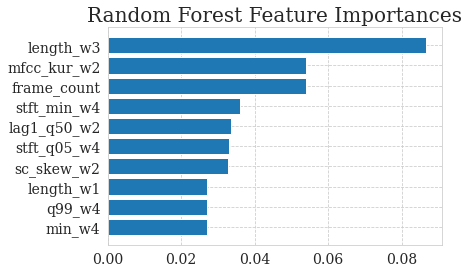

In [23]:
nbr_features = 10
tree_feature_importances = model_vocal_channel.feature_importances_
sorted_idx = tree_feature_importances.argsort()[-nbr_features:]
y_ticks = np.arange(0, len(sorted_idx))
fig, ax = plt.subplots()
plt.barh(y_ticks, tree_feature_importances[sorted_idx])
plt.yticks(y_ticks, np.array(df_train_model_vc_fi.columns)[sorted_idx])
plt.title("Random Forest Feature Importances")
ax.tick_params(axis='both', which='major', labelsize=14)
plt.show()

In [24]:
imps, vars_ = feature_importance(model_vocal_channel, df_train_model_vc)

Feature: min_w4, Importance: 0.026925275761161088
Feature: q99_w4, Importance: 0.027000313099618974
Feature: length_w1, Importance: 0.02708556850877683
Feature: sc_skew_w2, Importance: 0.03267372536097786
Feature: stft_q05_w4, Importance: 0.03309346237511948
Feature: lag1_q50_w2, Importance: 0.03354853353423932
Feature: stft_min_w4, Importance: 0.03604067419933949
Feature: frame_count, Importance: 0.05388303072051057
Feature: mfcc_kur_w2, Importance: 0.05400348895228294
Feature: length_w3, Importance: 0.08673516510481415


In [25]:
X_train_vc_fi = np.array(df_train_model_vc_fi[vars_])
X_test_vc_fi = np.array(df_test_model_vc_fi[vars_])

In [26]:
randomforest_vocal_channel_fi = random_forest(X_train_vc_fi, y_train_vc)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [27]:
print("Tuned Random Forest Parameters after Feature Importance: {}".format(randomforest_vocal_channel_fi.best_params_))



Tuned Random Forest Parameters after Feature Importance: {'criterion': 'log_loss', 'max_depth': 172, 'max_features': 'sqrt', 'min_samples_leaf': 0.003957636057552371, 'min_samples_split': 0.01778238261834975}


In [28]:
model_vocal_channel_fi = randomforest_vocal_channel_fi.best_estimator_
model_vocal_channel_fi.fit(X_train_vc_fi,y_train_vc)

RandomForestClassifier(criterion='log_loss', max_depth=172,
                       min_samples_leaf=0.003957636057552371,
                       min_samples_split=0.01778238261834975, random_state=42)

In [29]:
y_pred_rf_vc_fi = model_vocal_channel_fi.predict(X_test_vc_fi)

In [30]:
print(classification_report(y_test_vc, y_pred_rf_vc_fi))

              precision    recall  f1-score   support

         0.0       0.86      0.98      0.92       264
         1.0       0.99      0.88      0.93       360

    accuracy                           0.92       624
   macro avg       0.92      0.93      0.92       624
weighted avg       0.93      0.92      0.93       624



## Sex

In [31]:
df_train_model_s = df_train.copy()

In [32]:
df_test_model_s = df_test.copy()

In [33]:
label_encoder = preprocessing.LabelEncoder()
df_train_model_s_fi = df_train_model_s.drop("sex", axis=1)
df_train_model_s_fi = pd.get_dummies(df_train_model_s_fi)
df_train_model_s_fi["sex"] = df_train["sex"]
df_train_model_s_fi["sex"] = label_encoder.fit_transform(df_train_model_s_fi['sex'])

In [34]:
label_encoder = preprocessing.LabelEncoder()
df_test_model_s_fi = df_test_model_s.drop("sex", axis=1)
df_test_model_s_fi = pd.get_dummies(df_test_model_s_fi)
df_test_model_s_fi["sex"] = df_test["sex"]
df_test_model_s_fi["sex"] = label_encoder.fit_transform(df_test_model_s_fi['sex'])

In [35]:
X_train_s = df_train_model_s.drop("sex", axis=1)
X_train_s = np.array(pd.get_dummies(X_train_s))
y_train_s = label_Encoder(df_train_model_s["sex"], 'M')

In [36]:
X_test_s = df_test_model_s.drop("sex", axis=1)
X_test_s = np.array(pd.get_dummies(X_test_s))
y_test_s = label_Encoder(df_test_model_s["sex"], 'M')

In [37]:
randomforest_sex = random_forest(X_train_s, y_train_s)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [38]:
print("Tuned Random Forest Parameters: {}".format(randomforest_sex.best_params_))

Tuned Random Forest Parameters: {'criterion': 'entropy', 'max_depth': 78, 'max_features': None, 'min_samples_leaf': 0.005031160146949308, 'min_samples_split': 0.011257403265027485}


In [39]:
model_sex = randomforest_sex.best_estimator_
model_sex.fit(X_train_s,y_train_s)

RandomForestClassifier(criterion='entropy', max_depth=78, max_features=None,
                       min_samples_leaf=0.005031160146949308,
                       min_samples_split=0.011257403265027485, random_state=42)

In [40]:
y_pred_rf_s = model_sex.predict(X_test_s)

In [41]:
print(classification_report(y_test_s, y_pred_rf_s))

              precision    recall  f1-score   support

         0.0       0.99      0.71      0.82       312
         1.0       0.77      0.99      0.87       312

    accuracy                           0.85       624
   macro avg       0.88      0.85      0.85       624
weighted avg       0.88      0.85      0.85       624



In [42]:
accuracy_s = accuracy_score(y_test_s, y_pred_rf_s)
f1_score_s = f1_score(y_test_s, y_pred_rf_s, average = 'weighted')

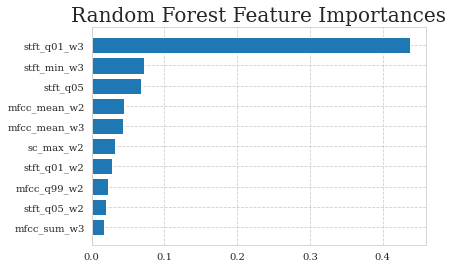

In [43]:
nbr_features = 10
tree_feature_importances = model_sex.feature_importances_
sorted_idx = tree_feature_importances.argsort()[-nbr_features:]
y_ticks = np.arange(0, len(sorted_idx))
fig, ax = plt.subplots()
plt.barh(y_ticks, tree_feature_importances[sorted_idx])
plt.yticks(y_ticks, np.array(df_train_model_s_fi.columns)[sorted_idx])
plt.title("Random Forest Feature Importances")
plt.show()

In [44]:
imps_s, vars_s = feature_importance(model_sex, df_train_model_s_fi)

Feature: mfcc_sum_w3, Importance: 0.01665377315575821
Feature: stft_q05_w2, Importance: 0.01952586447361993
Feature: mfcc_q99_w2, Importance: 0.022233863488188045
Feature: stft_q01_w2, Importance: 0.027767961218406044
Feature: sc_max_w2, Importance: 0.0317550636737642
Feature: mfcc_mean_w3, Importance: 0.043119867005455
Feature: mfcc_mean_w2, Importance: 0.044465798755123395
Feature: stft_q05, Importance: 0.06826624808490532
Feature: stft_min_w3, Importance: 0.07166513353733175
Feature: stft_q01_w3, Importance: 0.438022069126938


In [45]:
X_train_s_fi = np.array(df_train_model_s_fi[vars_s])
X_test_s_fi = np.array(df_test_model_s_fi[vars_s])

In [46]:
randomforest_sex_fi = random_forest(X_train_s_fi, y_train_s)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [47]:
print("Tuned Random Forest Parameters after Feature Importance: {}".format(randomforest_sex_fi.best_params_))




Tuned Random Forest Parameters after Feature Importance: {'criterion': 'log_loss', 'max_depth': 118, 'max_features': 'sqrt', 'min_samples_leaf': 0.005767755627779847, 'min_samples_split': 0.015563025194721936}


In [48]:
model_sex_fi = randomforest_sex_fi.best_estimator_
model_sex_fi.fit(X_train_s_fi,y_train_s)

RandomForestClassifier(criterion='log_loss', max_depth=118,
                       min_samples_leaf=0.005767755627779847,
                       min_samples_split=0.015563025194721936, random_state=42)

In [49]:
y_pred_rf_s_fi = model_sex_fi.predict(X_test_s_fi)

In [50]:
print(classification_report(y_test_s, y_pred_rf_s_fi))

              precision    recall  f1-score   support

         0.0       0.99      0.67      0.80       312
         1.0       0.75      0.99      0.85       312

    accuracy                           0.83       624
   macro avg       0.87      0.83      0.83       624
weighted avg       0.87      0.83      0.83       624



## Emotional Intensity

In [51]:
df_train_model_ei = df_train.copy()

In [52]:
df_test_model_ei = df_test.copy()

In [53]:
label_encoder = preprocessing.LabelEncoder()
df_train_model_ei_fi = df_train_model_ei.drop("emotional_intensity", axis=1)
df_train_model_ei_fi = pd.get_dummies(df_train_model_ei_fi)
df_train_model_ei_fi["emotional_intensity"] = df_train["emotional_intensity"]
df_train_model_ei_fi["emotional_intensity"] = label_encoder.fit_transform(df_train_model_ei_fi['emotional_intensity'])

In [54]:
label_encoder = preprocessing.LabelEncoder()
df_test_model_ei_fi = df_test_model_ei.drop("emotional_intensity", axis=1)
df_test_model_ei_fi = pd.get_dummies(df_test_model_ei_fi)
df_test_model_ei_fi["emotional_intensity"] = df_test["emotional_intensity"]
df_test_model_ei_fi["emotional_intensity"] = label_encoder.fit_transform(df_test_model_ei_fi['emotional_intensity'])

In [55]:
X_train_ei = df_train_model_ei.drop("emotional_intensity", axis=1)
X_train_ei = np.array(pd.get_dummies(X_train_ei))
y_train_ei = label_Encoder(df_train_model_ei["emotional_intensity"], 'normal')

In [56]:
X_train_ei.shape

(1828, 392)

In [57]:
X_test_ei = df_test_model_ei.drop("emotional_intensity", axis=1)
X_test_ei = np.array(pd.get_dummies(X_test_ei))
y_test_ei = label_Encoder(df_test_model_ei["emotional_intensity"], 'normal')

In [58]:
randomforest_emotional_intensity = random_forest(X_train_ei, y_train_ei)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [59]:
print("Tuned Random Forest Parameters: {}".format(randomforest_emotional_intensity.best_params_))

Tuned Random Forest Parameters: {'criterion': 'gini', 'max_depth': 38, 'max_features': None, 'min_samples_leaf': 0.004061502448033582, 'min_samples_split': 0.018852412749453266}


In [60]:
model_emotional_intensity = randomforest_emotional_intensity.best_estimator_
model_emotional_intensity.fit(X_train_ei,y_train_ei)

RandomForestClassifier(max_depth=38, max_features=None,
                       min_samples_leaf=0.004061502448033582,
                       min_samples_split=0.018852412749453266, random_state=42)

In [61]:
y_pred_rf_ei = model_emotional_intensity.predict(X_test_ei)

In [62]:
print(classification_report(y_test_ei, y_pred_rf_ei))

              precision    recall  f1-score   support

         0.0       0.72      0.83      0.77       288
         1.0       0.83      0.73      0.77       336

    accuracy                           0.77       624
   macro avg       0.78      0.78      0.77       624
weighted avg       0.78      0.77      0.77       624



In [63]:
accuracy_ei = accuracy_score(y_test_ei, y_pred_rf_ei)
f1_score_ei = f1_score(y_test_ei, y_pred_rf_ei, average = 'weighted')

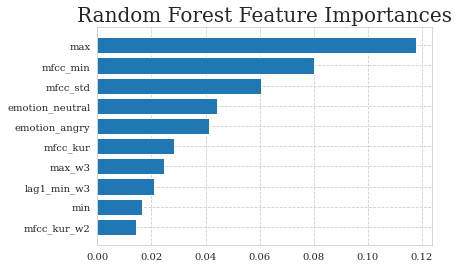

In [64]:
nbr_features = 10
tree_feature_importances = model_emotional_intensity.feature_importances_
sorted_idx = tree_feature_importances.argsort()[-nbr_features:]
y_ticks = np.arange(0, len(sorted_idx))
fig, ax = plt.subplots()
plt.barh(y_ticks, tree_feature_importances[sorted_idx])
plt.yticks(y_ticks, np.array(df_train_model_ei_fi.columns)[sorted_idx])
plt.title("Random Forest Feature Importances")
plt.show()

In [65]:
imps_ei, vars_ei = feature_importance(model_emotional_intensity, df_train_model_ei_fi)

Feature: mfcc_kur_w2, Importance: 0.014441916226286497
Feature: min, Importance: 0.016554919236442367
Feature: lag1_min_w3, Importance: 0.02093714959093386
Feature: max_w3, Importance: 0.024507501352780424
Feature: mfcc_kur, Importance: 0.02833421606466985
Feature: emotion_angry, Importance: 0.041191061969200554
Feature: emotion_neutral, Importance: 0.044075458207366885
Feature: mfcc_std, Importance: 0.060564165132959265
Feature: mfcc_min, Importance: 0.0800535110237238
Feature: max, Importance: 0.1179976353998825


In [66]:
X_train_ei_fi = np.array(df_train_model_ei_fi[vars_ei])
X_test_ei_fi = np.array(df_test_model_ei_fi[vars_ei])

In [67]:
randomforest_emotional_intensity_fi = random_forest(X_train_ei_fi, y_train_ei)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [68]:
print("Tuned Random Forest Parameters after Feature Importance: {}".format(randomforest_emotional_intensity_fi.best_params_))



Tuned Random Forest Parameters after Feature Importance: {'criterion': 'gini', 'max_depth': 31, 'max_features': 'log2', 'min_samples_leaf': 0.011956071146734849, 'min_samples_split': 0.015006788338463464}


In [69]:
model_emotional_intensity_fi = randomforest_emotional_intensity_fi.best_estimator_
model_emotional_intensity_fi.fit(X_train_ei_fi,y_train_ei)

RandomForestClassifier(max_depth=31, max_features='log2',
                       min_samples_leaf=0.011956071146734849,
                       min_samples_split=0.015006788338463464, random_state=42)

In [70]:
y_pred_rf_ei_fi = model_emotional_intensity_fi.predict(X_test_ei_fi)

In [71]:
print(classification_report(y_test_ei, y_pred_rf_ei_fi))

              precision    recall  f1-score   support

         0.0       0.69      0.71      0.70       288
         1.0       0.74      0.72      0.73       336

    accuracy                           0.72       624
   macro avg       0.71      0.72      0.72       624
weighted avg       0.72      0.72      0.72       624



## Emotion

In [72]:
def label_encoder_e(array):
    new_array = np.zeros(len(array))
    for i in range(len(array)):
        if array[i] == "calm":
            new_array[i] = 1
        elif array[i] == "happy":
            new_array[i] = 2
        elif array[i] == "sad":
            new_array[i] = 3
        elif array[i] == "angry":
            new_array[i] = 4
        elif array[i] == "fearful":
            new_array[i] = 5
        elif array[i] == "disgust":
            new_array[i] = 6
        elif array[i] == "surprised":
            new_array[i] = 7
    return new_array

In [73]:
df_train_model_e = df_train.copy()

In [74]:
df_test_model_e = df_test.copy()

In [75]:
label_encoder = preprocessing.LabelEncoder()
df_train_model_e_fi = df_train_model_e.drop("emotion", axis=1)
df_train_model_e_fi = pd.get_dummies(df_train_model_e_fi)
df_train_model_e_fi["emotion"] = df_train["emotion"]
df_train_model_e_fi["emotion"] = label_encoder.fit_transform(df_train_model_e_fi['emotion'])

In [76]:
label_encoder = preprocessing.LabelEncoder()
df_test_model_e_fi = df_test_model_e.drop("emotion", axis=1)
df_test_model_e_fi = pd.get_dummies(df_test_model_e_fi)
df_test_model_e_fi["emotion"] = df_test["emotion"]
df_test_model_e_fi["emotion"] = label_encoder.fit_transform(df_test_model_e_fi['emotion'])

In [77]:
X_train_e = df_train_model_e.drop("emotion", axis=1)
X_train_e = np.array(pd.get_dummies(X_train_e))
y_train_e = label_encoder_e(df_train_model_e["emotion"])

In [78]:
X_test_e = df_test_model_e.drop("emotion", axis=1)
X_test_e = np.array(pd.get_dummies(X_test_e))
y_test_e = label_encoder_e(df_test_model_ei["emotion"])

In [79]:
randomforest_emotion = random_forest(X_train_e, y_train_e)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [80]:
print("Tuned Random Forest Parameters: {}".format(randomforest_emotion.best_params_))

Tuned Random Forest Parameters: {'criterion': 'log_loss', 'max_depth': 81, 'max_features': None, 'min_samples_leaf': 0.010726533964018327, 'min_samples_split': 0.02143326037474048}


In [81]:
model_emotion = randomforest_emotion.best_estimator_
model_emotion.fit(X_train_e,y_train_e)

RandomForestClassifier(criterion='log_loss', max_depth=81, max_features=None,
                       min_samples_leaf=0.010726533964018327,
                       min_samples_split=0.02143326037474048, random_state=42)

In [82]:
y_pred_rf_e = model_emotion.predict(X_test_e)

In [83]:
print(classification_report(y_test_e, y_pred_rf_e))

              precision    recall  f1-score   support

         0.0       0.47      0.31      0.38        48
         1.0       0.47      0.64      0.54        96
         2.0       0.32      0.41      0.36        96
         3.0       0.36      0.22      0.27        96
         4.0       0.47      0.84      0.60        96
         5.0       0.54      0.22      0.31        96
         6.0       0.47      0.31      0.38        48
         7.0       0.41      0.33      0.37        48

    accuracy                           0.43       624
   macro avg       0.44      0.41      0.40       624
weighted avg       0.44      0.43      0.41       624



In [84]:
accuracy_e = accuracy_score(y_test_e, y_pred_rf_e)
f1_score_e = f1_score(y_test_e, y_pred_rf_e, average = 'weighted')

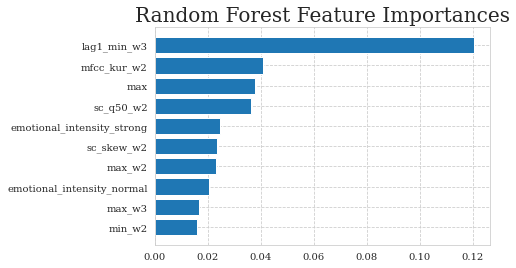

In [85]:
nbr_features = 10
tree_feature_importances = model_emotion.feature_importances_
sorted_idx = tree_feature_importances.argsort()[-nbr_features:]
y_ticks = np.arange(0, len(sorted_idx))
fig, ax = plt.subplots()
plt.barh(y_ticks, tree_feature_importances[sorted_idx])
plt.yticks(y_ticks, np.array(df_train_model_e_fi.columns)[sorted_idx])
plt.title("Random Forest Feature Importances")
plt.show()

In [86]:
imps_e, vars_e = feature_importance(model_emotion, df_train_model_e_fi)

Feature: min_w2, Importance: 0.015930464845074696
Feature: max_w3, Importance: 0.016674061319627093
Feature: emotional_intensity_normal, Importance: 0.02045321191382372
Feature: max_w2, Importance: 0.02298796125669195
Feature: sc_skew_w2, Importance: 0.023453499560887527
Feature: emotional_intensity_strong, Importance: 0.02476409829961684
Feature: sc_q50_w2, Importance: 0.03629496057512796
Feature: max, Importance: 0.038033146850647
Feature: mfcc_kur_w2, Importance: 0.04077145808474288
Feature: lag1_min_w3, Importance: 0.12034246094117794


In [87]:
X_train_e_fi = np.array(df_train_model_e_fi[vars_e])
X_test_e_fi = np.array(df_test_model_e_fi[vars_e])

In [88]:
randomforest_emotion_fi = random_forest(X_train_e_fi, y_train_e)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [89]:
print("Tuned Random Forest Parameters after Feature Importance: {}".format(randomforest_emotion_fi.best_params_))


Tuned Random Forest Parameters after Feature Importance: {'criterion': 'log_loss', 'max_depth': 29, 'max_features': 'log2', 'min_samples_leaf': 0.010559924575005476, 'min_samples_split': 0.05152509146105552}


In [90]:
model_emotion_fi = randomforest_emotion_fi.best_estimator_
model_emotion_fi.fit(X_train_e_fi,y_train_e)

RandomForestClassifier(criterion='log_loss', max_depth=29, max_features='log2',
                       min_samples_leaf=0.010559924575005476,
                       min_samples_split=0.05152509146105552, random_state=42)

In [91]:
y_pred_rf_e_fi = model_emotion_fi.predict(X_test_e_fi)

In [92]:
print(classification_report(y_test_e, y_pred_rf_e_fi))

              precision    recall  f1-score   support

         0.0       0.27      0.25      0.26        48
         1.0       0.43      0.72      0.54        96
         2.0       0.31      0.59      0.41        96
         3.0       0.35      0.08      0.13        96
         4.0       0.53      0.85      0.65        96
         5.0       0.33      0.07      0.12        96
         6.0       0.67      0.04      0.08        48
         7.0       0.36      0.27      0.31        48

    accuracy                           0.40       624
   macro avg       0.41      0.36      0.31       624
weighted avg       0.40      0.40      0.34       624



## Some emotions

In [93]:
df_train_model_es = df_train.copy()

In [94]:
df_test_model_es = df_test.copy()

In [95]:
df_train_subset = df_train_model_es[(df_train_model_es["emotion"] == 'happy')] 
df_train_subset1 = df_train_model_es[(df_train_model_es["emotion"] == 'sad')]
df_train_subset_e = pd.concat([df_train_subset, df_train_subset1])

In [96]:
label_encoder_es = preprocessing.LabelEncoder()
X_train_es = df_train_subset_e.drop("emotion", axis=1)
X_train_es = np.array(pd.get_dummies(X_train_es))
y_train_es = label_encoder_es.fit_transform(df_train_subset_e['emotion'])

In [97]:
df_test_subset = df_test_model_es[(df_test_model_es["emotion"] == 'happy')] 
df_test_subset1 = df_test_model_es[(df_test_model_es["emotion"] == 'sad')]
df_test_subset_e = pd.concat([df_test_subset, df_test_subset1])

In [98]:
X_test_es = df_test_subset_e.drop("emotion", axis=1)
X_test_es = np.array(pd.get_dummies(X_test_es))
y_test_es = label_encoder_es.fit_transform(df_test_subset_e["emotion"])

In [99]:
randomforest_emotion_subset = random_forest(X_train_es, y_train_es)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [100]:
print("Tuned Random Forest Parameters: {}".format(randomforest_emotion_subset.best_params_))

Tuned Random Forest Parameters: {'criterion': 'gini', 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 0.02588355614511393, 'min_samples_split': 0.015621731488839677}


In [101]:
model_emotion_subset = randomforest_emotion_subset.best_estimator_
model_emotion_subset.fit(X_train_es,y_train_es)

RandomForestClassifier(max_depth=30, min_samples_leaf=0.02588355614511393,
                       min_samples_split=0.015621731488839677, random_state=42)

In [102]:
y_pred_rf_es = model_emotion_subset.predict(X_test_es)

In [103]:
print(classification_report(y_test_es, y_pred_rf_es))

              precision    recall  f1-score   support

           0       0.78      0.81      0.80        96
           1       0.80      0.77      0.79        96

    accuracy                           0.79       192
   macro avg       0.79      0.79      0.79       192
weighted avg       0.79      0.79      0.79       192



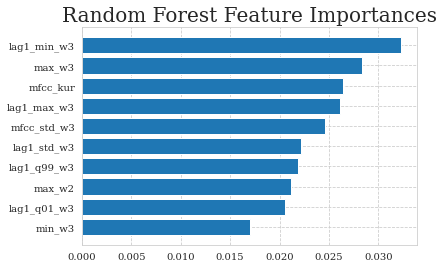

In [104]:
nbr_features = 10
tree_feature_importances = model_emotion_subset.feature_importances_
sorted_idx = tree_feature_importances.argsort()[-nbr_features:]
y_ticks = np.arange(0, len(sorted_idx))
fig, ax = plt.subplots()
plt.barh(y_ticks, tree_feature_importances[sorted_idx])
plt.yticks(y_ticks, np.array(df_train_model_ei_fi.columns)[sorted_idx])
plt.title("Random Forest Feature Importances")
plt.show()

In [ ]:
randomforest_emotion_subset_fi = random_forest(X_train_es_fi, y_train_es)

In [ ]:
print("Tuned Random Forest Parameters after Feature Importance: {}".format(randomforest_emotion_subset_fi.best_params_))





In [ ]:
model_emotion_subset_fi = randomforest_emotion_subset_fi.best_estimator_
model_emotion_subset_fi.fit(X_train_es_fi,y_train_es)

In [ ]:
y_pred_rf_es_fi = model_emotion_subset_fi.predict(X_test_es_fi)

In [ ]:
print(classification_report(y_test_es, y_pred_rf_es_fi))

In [132]:
# vocal_channel

vocal_channel_metrics_b = pd.DataFrame(columns=["LG", "RF", "DTB", "AB"], 
                       index=["Accuracy", "F1-Score (Weighted-Average)"])
vocal_channel_metrics_b.loc["Accuracy"] = [None, None, None, None]
vocal_channel_metrics_b.loc["F1-Score (Weighted-Average)"] = [None, None, None, None]
vocal_channel_metrics_b

,LG,RF,DTB,AB
Accuracy,None,None,None,None
F1-Score (Weighted-Average),None,None,None,None


In [133]:
vocal_channel_metrics_b.loc["Accuracy"][1] = accuracy_vc
vocal_channel_metrics_b.loc["F1-Score (Weighted-Average)"][1] = f1_score_vc

In [134]:
vocal_channel_metrics_b.to_csv('vocal_channel_metric.csv', index = False)

In [135]:
y_score = model_vocal_channel.predict_proba(X_test_vc)
fpr, tpr, _ = roc_curve(y_test_vc, y_score[:,1],pos_label=1)
roc_auc = auc(fpr, tpr)

In [136]:
vocal_channel_roc_b = pd.DataFrame(columns=["LG", "RF", "DTB", "AB"], 
                       index=["fpr", "tpr", "auc"])
vocal_channel_roc_b.loc["fpr"] = [None, None, None, None]
vocal_channel_roc_b.loc["tpr"] = [None, None, None, None]
vocal_channel_roc_b.loc["auc"] = [None, None, None, None]
vocal_channel_roc_b

,LG,RF,DTB,AB
fpr,None,None,None,None
tpr,None,None,None,None
auc,None,None,None,None


In [137]:
vocal_channel_roc_b.loc["fpr"][1] = fpr
vocal_channel_roc_b.loc["tpr"][1] = tpr
vocal_channel_roc_b.loc["auc"][1] = roc_auc

In [138]:
vocal_channel_roc_b.to_csv('vocal_channel_score.csv', index=False)

In [139]:
# sex

sex_metrics_b = pd.DataFrame(columns=["LG", "RF", "DTB", "AB"], 
                       index=["Accuracy", "F1-Score (Weighted-Average)"])
sex_metrics_b.loc["Accuracy"] = [None, None, None, None]
sex_metrics_b.loc["F1-Score (Weighted-Average)"] = [None, None, None, None]
sex_metrics_b

,LG,RF,DTB,AB
Accuracy,None,None,None,None
F1-Score (Weighted-Average),None,None,None,None


In [140]:
sex_metrics_b.loc["Accuracy"][1] = accuracy_s
sex_metrics_b.loc["F1-Score (Weighted-Average)"][1] = f1_score_s

In [141]:
sex_metrics_b.to_csv('sex_metric.csv', index = False)

In [142]:
y_score_s = model_sex.predict_proba(X_test_s)
fpr_s, tpr_s, _ = roc_curve(y_test_s, y_score_s[:, 1], pos_label=1)
roc_auc_s = auc(fpr_s, tpr_s)

In [143]:
sex_roc_b = pd.DataFrame(columns=["LG", "RF", "DTB", "AB"], 
                       index=["fpr", "tpr", "auc"])
sex_roc_b.loc["fpr"] = [None, None, None, None]
sex_roc_b.loc["tpr"] = [None, None, None, None]
sex_roc_b.loc["auc"] = [None, None, None, None]
sex_roc_b

,LG,RF,DTB,AB
fpr,None,None,None,None
tpr,None,None,None,None
auc,None,None,None,None


In [144]:
sex_roc_b.loc["fpr"][1] = fpr_s
sex_roc_b.loc["tpr"][1] = tpr_s
sex_roc_b.loc["auc"][1] = roc_auc_s

In [145]:
sex_roc_b.to_csv('sex_score.csv', index=False)

In [146]:
# emotional_intensity

emotional_intensity_metrics_b = pd.DataFrame(columns=["LG", "RF", "DTB", "AB"], 
                       index=["Accuracy", "F1-Score (Weighted-Average)"])
emotional_intensity_metrics_b.loc["Accuracy"] = [None, None, None, None]
emotional_intensity_metrics_b.loc["F1-Score (Weighted-Average)"] = [None, None, None, None]
emotional_intensity_metrics_b

,LG,RF,DTB,AB
Accuracy,None,None,None,None
F1-Score (Weighted-Average),None,None,None,None


In [147]:
emotional_intensity_metrics_b.loc["Accuracy"][1] = accuracy_ei
emotional_intensity_metrics_b.loc["F1-Score (Weighted-Average)"][1] = f1_score_ei

In [148]:
emotional_intensity_metrics_b.to_csv('emotional_intensity_metrics.csv', index=False)

In [149]:
y_score_ei = model_emotional_intensity.predict_proba(X_test_ei)
fpr_ei, tpr_ei, _ = roc_curve(y_test_ei, y_score_ei[:, 1], pos_label = 1)
roc_auc_ei = auc(fpr_ei, tpr_ei)

In [150]:
# emotional_intensity

emotional_intensity_roc_b = pd.DataFrame(columns=["LG", "RF", "DTB", "AB"], 
                       index=["fpr", "tpr", "auc"])
emotional_intensity_roc_b.loc["fpr"] = [None, None, None, None]
emotional_intensity_roc_b.loc["tpr"] = [None, None, None, None]
emotional_intensity_roc_b.loc["auc"] = [None, None, None, None]
emotional_intensity_roc_b

,LG,RF,DTB,AB
fpr,None,None,None,None
tpr,None,None,None,None
auc,None,None,None,None


In [151]:
emotional_intensity_roc_b.loc["fpr"][1] = fpr_ei
emotional_intensity_roc_b.loc["tpr"][1] = tpr_ei
emotional_intensity_roc_b.loc["auc"][1] = roc_auc_ei

In [152]:
emotional_intensity_roc_b.to_csv('emotional_intensity_scores.csv', index=False)

In [153]:
# emotion

emotion_metrics_b = pd.DataFrame(columns=["LG", "RF", "DTB", "AB"], 
                       index=["Accuracy", "F1-Score (Weighted-Average)"])
emotion_metrics_b.loc["Accuracy"] = [None, None, None, None]
emotion_metrics_b.loc["F1-Score (Weighted-Average)"] = [None, None, None, None]
emotion_metrics_b

,LG,RF,DTB,AB
Accuracy,None,None,None,None
F1-Score (Weighted-Average),None,None,None,None


In [154]:
emotion_metrics_b.loc["Accuracy"][1] = accuracy_e
emotion_metrics_b.loc["F1-Score (Weighted-Average)"][1] = f1_score_e

In [155]:
emotion_metrics_b.to_csv('emotion_metrics.csv', index=False)